## MSTICPy and Notebooks in InfoSec

---

<h1 style="border: solid; padding:5pt; color:black; background-color:#909090">Session 4 - Data Visualization with MSTICPy</h1>

---

## What this session covers:

- Event timelines
  - Basics
  - Grouping
  - Hover columns
  - Variants - timeline_values, timeline_duration
- Process Tree
- Graphs


## Prerequisites
- Python >= 3.8 Environment
- Jupyter installed
- MSTICPy installed
- Run az login

## Recommended
- VS Code


---

# <a style="border: solid; padding:5pt; color:black; background-color:#909090">Notebook Setup</a>

---

In [1]:
%env MSTICPYCONFIG=./msticpyconfig.yaml
import msticpy as mp
mp.init_notebook()

env: MSTICPYCONFIG=./msticpyconfig.yaml


---

# <a style="border: solid; padding:5pt; color:black; background-color:#909090">MSTICPy Timeline</a>

---

### - Use Bokeh plots (Python/Javascript visualization library)
### - Will work with any data that has a time stamp
### - Grouping by property
### - Hover/tooltips
### - Invoked from `pandas` accessor
#### [Reference: Timeline Documentation](https://msticpy.readthedocs.io/en/latest/visualization/EventTimeline.html)

## Note: Read data from an excel sheet

- You need to `pip install openpyxl`
- `df = pd.read_excel('/path/to/file.xlsx')`

#### You may need to play around with things like date formats since Excel
- Sometimes gives you dates as string
- Doesn't support timezone-aware dates

> We're going to use `procs_df = qry_local.WindowsSecurity.list_host_processes_mde()`

In [2]:
procs_df = pd.read_excel("./data/host_procs.xlsx")
procs_df.head()

CreatedProcessIsElevated CreatedProcessIntegrityLevel  \
0                     False                       Medium   
1                     False                       Medium   
2                     False                       Medium   
3                     False                       Medium   
4                     False                       Medium   

                               CreatedProcessAccountSid  \
0  S-1-12-1-3476864874-1154527411-4288707492-1560701320   
1  S-1-12-1-3476864874-1154527411-4288707492-1560701320   
2  S-1-12-1-3476864874-1154527411-4288707492-1560701320   
3  S-1-12-1-3476864874-1154527411-4288707492-1560701320   
4  S-1-12-1-3476864874-1154527411-4288707492-1560701320   

  CreatedProcessAccountName CreatedProcessAccountDomainName  \
0              User_a1cdc01                     Dom_372fa53   
1              User_a1cdc01                     Dom_372fa53   
2              User_a1cdc01                     Dom_372fa53   
3              User_a1cdc01                     Dom_372fa53   
4              User_a1cdc01                     Dom_372fa53   

  CreatedProcessTokenElevationType CreatedProcessFileMarkOfTheWeb  \
0        TokenElevationTypeLimited                         NotWeb   
1        TokenElevationTypeLimited                         NotWeb   
2        TokenElevationTypeLimited                         NotWeb   
3        TokenElevationTypeLimited                         NotWeb   
4        TokenElevationTypeLimited                         NotWeb   

   CreatedProcessCreationTime  CreatedProcessId  CreatedProcessName  \
0                         NaN               NaN                 NaN   
1                         NaN               NaN                 NaN   
2                         NaN               NaN                 NaN   
3                         NaN               NaN                 NaN   
4                         NaN               NaN                 NaN   

   CreatedProcessCommandLine  CreatedProcessFileType  \
0                        NaN                     NaN   
1                        NaN                     NaN   
2                        NaN                     NaN   
3                        NaN                     NaN   
4                        NaN                     NaN   

   CreatedProcessFileCreationTime  CreatedProcessFilePath  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             NaN                     NaN   
3                             NaN                     NaN   
4                             NaN                     NaN   

   CreatedProcessFileSize  CreatedProcessFileMd5  CreatedProcessFileSha256  \
0                     NaN                    NaN                       NaN   
1                     NaN                    NaN                       NaN   
2                     NaN                    NaN                       NaN   
3                     NaN                    NaN                       NaN   
4                     NaN                    NaN                       NaN   

   CreatedProcessFileSha1  InitiatingProcessImageMd5  \
0                     NaN                        NaN   
1                     NaN                        NaN   
2                     NaN                        NaN   
3                     NaN                        NaN   
4                     NaN                        NaN   

   InitiatingProcessImageSha256  InitiatingProcessImageSha1  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   

   InitiatingProcessAccountSid  InitiatingProcessAccountDomainName  \
0                          NaN                                 NaN   
1                          NaN       

In [3]:
qry_local = mp.QueryProvider("LocalData")
procs_df = qry_local.M365D.list_host_processes_mde()

In [4]:
procs_df.mp_plot.timeline(time_column="CreatedProcessCreationTime")

Loading BokehJS ...

Column(id='p1269', ...)

## Navigating Bokeh plots

### Toolbar

![Bokeh toolbar](./media/bokeh_toolbar.png)

![Bokeh RangeTool](./media/Bokeh_rangecontrol.png)

In [5]:
help(procs_df.mp_plot.timeline)

Help on method timeline in module msticpy.vis.mp_pandas_plot:

timeline(**kwargs) -> bokeh.models.layouts.LayoutDOM method of msticpy.vis.mp_pandas_plot.MsticpyPlotAccessor instance
    Display a timeline of events.
    
    Parameters
    ----------
    time_column : str, optional
        Name of the timestamp column
        (the default is 'TimeGenerated')
    source_columns : list, optional
        List of default source columns to use in tooltips
        (the default is None)
    
    Other Parameters
    ----------------
    title : str, optional
        Title to display (the default is None)
    alert : SecurityAlert, optional
        Add a reference line/label using the alert time (the default is None)
    ref_event : Any, optional
        Add a reference line/label using the alert time (the default is None)
    ref_time : datetime, optional
        Add a reference line/label using `ref_time` (the default is None)
    group_by : str
        The column to group timelines on.
    

## Grouping timeline events



In [6]:
procs_df.mp_plot.timeline(
    time_column="CreatedProcessCreationTime",
    group_by="CreatedProcessAccountName",
    legend="none"
)

Loading BokehJS ...

Column(id='p2092', ...)

## Adding hover (tooltip) columns

## <a style="border: solid; padding:5pt; color:black; background-color:#309030">Task 1 - Add tooltip columnsName</a>

Add some informative columns to the the hover/tooltip box

1. Choose the columns from the list of available columns
2. Use Python `help(procs_df.mp_plot.timeline)` to find the correct parameter name to specify the list of columns
3. Extend the previous plot to add the columns


<details>
<summary>Hints...</summary>
<ul>
<li>Use the cell below to identify columns in the source dataframe.</li>
<li>Use the <b>source_columns</b> to specify a list of columns.</li>
<li>Final command should look something like this
<pre>
procs_df.mp_plot.timeline(
    time_column="CreatedProcessCreationTime",
    group_by="CreatedProcessAccountName",
    legend="none",
    source_columns=["CreatedProcessName", "CreatedProcessCommandLine"]
)
</pre>
</li>
</ul>
</details>


In [7]:
procs_df.filter(regex="CreatedProcess.*").columns

Index(['CreatedProcessIsElevated', 'CreatedProcessIntegrityLevel',
       'CreatedProcessAccountSid', 'CreatedProcessAccountName',
       'CreatedProcessAccountDomainName', 'CreatedProcessTokenElevationType',
       'CreatedProcessFileMarkOfTheWeb', 'CreatedProcessCreationTime',
       'CreatedProcessId', 'CreatedProcessName', 'CreatedProcessCommandLine',
       'CreatedProcessFileType', 'CreatedProcessFileCreationTime',
       'CreatedProcessFilePath', 'CreatedProcessFileSize',
       'CreatedProcessFileMd5', 'CreatedProcessFileSha256',
       'CreatedProcessFileSha1', 'CreatedProcessStartKey',
       'CreatedProcessReparentingProcessCreationTimeUtc',
       'CreatedProcessReparentingProcessId',
       'CreatedProcessParentCreationTimeUtc', 'CreatedProcessParentName',
       'CreatedProcessParentId', 'CreatedProcessAttributes',
       'CreatedProcessAccountUpn', 'CreatedProcessAccountAzureADId',
       'CreatedProcessShowWindow', 'CreatedProcessStartupFlags',
       'CreatedProcessSig

In [8]:
procs_df.mp_plot.timeline(
    time_column="CreatedProcessCreationTime",
    group_by="CreatedProcessAccountName",
    legend="none",
    #...
)

Loading BokehJS ...

Column(id='p3272', ...)

---

# <a style="border: solid; padding:5pt; color:black; background-color:#909090">Timeline variants</a>

---

## Timeline duration

Highlight the start and end of activity

In [ ]:

procs_df.mp_plot.timeline_duration(
    time_column="CreatedProcessCreationTime",
    group_by="CreatedProcessAccountName",
    source_columns=["CreatedProcessName", "CreatedProcessCommandLine"]
)

Loading BokehJS ...

## Timeline values - plot scalar values


In [9]:
help(procs_df.mp_plot.timeline_values)

Help on method timeline_values in module msticpy.vis.mp_pandas_plot:

timeline_values(value_column: str = None, **kwargs) -> bokeh.models.layouts.LayoutDOM method of msticpy.vis.mp_pandas_plot.MsticpyPlotAccessor instance
    Display a timeline of events.
    
    Parameters
    ----------
    time_column : str, optional
        Name of the timestamp column
        (the default is 'TimeGenerated')
    value_column : str
        The column name holding the value to plot vertically
    source_columns : list, optional
        List of default source columns to use in tooltips
        (the default is None)
    
    Other Parameters
    ----------------
    x : str, optional
        alias of `time_column`
    y : str, optional
        alias of `value_column`
    value_col : str, optional
        alias of `value_column`
    title : str, optional
        Title to display (the default is None)
    ref_event : Any, optional
        Add a reference line/label using the alert time (the default is 

### Breakdown of the following command


| `qry_local` | `.Network `    | `.list_azure_network_flows_by_ip()` | `.mp_plot`  | `.timeline_values(` |
|-------------|----------------|-------------------------------------|-------------|---------------------|
| provider    | query_category | query (returns DF)                  | pd accessor | plot function       |

In [10]:
qry_local.Network.list_azure_network_flows_by_ip().mp_plot.timeline_values(
    time_column="FlowStartTime",
    value_column="TotalAllowedFlows",
    group_by="L7Protocol",
    kind=["circle", "vbar"],
    source_columns=["AllExtIPs"]
)


Loading BokehJS ...

Column(id='p4363', ...)

---

# <a style="border: solid; padding:5pt; color:black; background-color:#909090">Process Tree</a>

---

### [Reference: Process Tree](https://msticpy.readthedocs.io/en/latest/visualization/ProcessTree.html)

In [11]:
procs_df.mp_plot.process_tree()

Loading BokehJS ...

(figure(id='p4960', ...), Row(id='p5157', ...))

## <a style="border: solid; padding:5pt; color:black; background-color:#309030">Task 2 - Process Tree</a>

Plot process tree with legend highlighting process name.

1. Extend the previous plot command to color by process name
2. Optionally, hide the legend box 

Use help(procs_df.mp_plot.process_tree) to see function help
<details>
<summary>Hints...</summary>
<ul>

<li>Use <b>legend_col={col_name}</b>parameter</li>
<li>Use <b>hide_legend=True</b>parameter</li>
<li>Command should look like this
<pre>
procs_df.mp_plot.process_tree(
    legend_col="CreatedProcessName",
    hide_legend=True
)
</pre>
</li>
</ul>
</details>


In [ ]:
procs_df.mp_plot.process_tree(
    # ...
)

## Mini appendix
### Process tree utilities to investigation parts of the tree

In [12]:
# build a process tree DF
proc_tree = procs_df.mp.build_process_tree()

In [13]:
from msticpy.transform.process_tree_utils import get_children, get_ancestors, get_siblings, get_roots, get_descendents

# return root processes
get_roots(proc_tree)

CreatedProcessIsElevated  \
proc_key                                                                 
ntoskrnl.exe|4|2021-06-10 00:46:07.323060                          NaN   
wininit.exe|912|2021-06-10 00:46:10.511940                         NaN   
smss.exe|10520|2021-06-21 11:15:35.370650                          NaN   
outlook.exe|10576|2021-06-22 00:42:37.789900                       NaN   
userinit.exe|8572|2021-06-24 10:59:24.319380                       NaN   
update.exe|12256|2021-06-24 10:59:43.272400                        NaN   
userinit.exe|20356|2021-06-25 00:38:59.791720                      NaN   
acrobat.exe|17944|2021-06-25 00:41:29.156720                       NaN   
adobearm.exe|19296|2021-06-25 00:51:09.416660                      NaN   

                                              CreatedProcessIntegrityLevel  \
proc_key                                                                     
ntoskrnl.exe|4|2021-06-10 00:46:07.323060                              NaN   
wininit.exe|912|2021-06-10 00:46:10.511940                             NaN   
smss.exe|10520|2021-06-21 11:15:35.370650                              NaN   
outlook.exe|10576|2021-06-22 00:42:37.789900                           NaN   
userinit.exe|8572|2021-06-24 10:59:24.319380                           NaN   
update.exe|12256|2021-06-24 10:59:43.272400                            NaN   
userinit.exe|20356|2021-06-25 00:38:59.791720                          NaN   
acrobat.exe|17944|2021-06-25 00:41:29.156720                           NaN   
adobearm.exe|19296|2021-06-25 00:51:09.416660                          NaN   

                                              CreatedProcessAccountSid  \
proc_key                                                                 
ntoskrnl.exe|4|2021-06-10 00:46:07.323060                          NaN   
wininit.exe|912|2021-06-10 00:46:10.511940                         NaN   
smss.exe|10520|2021-06-21 11:15:35.370650                          NaN   
outlook.exe|10576|2021-06-22 00:42:37.789900                       NaN   
userinit.exe|8572|2021-06-24 10:59:24.319380                       NaN   
update.exe|12256|2021-06-24 10:59:43.272400                        NaN   
userinit.exe|20356|2021-06-25 00:38:59.791720                      NaN   
acrobat.exe|17944|2021-06-25 00:41:29.156720                       NaN   
adobearm.exe|19296|2021-06-25 00:51:09.416660                      NaN   

                                              CreatedProcessAccountName  \
proc_key                                                                  
ntoskrnl.exe|4|2021-06-10 00:46:07.323060                           NaN   
wininit.exe|912|2021-06-10 00:46:10.511940                          NaN   
smss.exe|10520|2021-06-21 11:15:35.370650                           NaN   
outlook.exe|10576|2021-06-22 00:42:37.789900                        NaN   
userinit.exe|8572|2021-06-24 10:59:24.319380                        NaN   
update.exe|12256|2021-06-24 10:59:43.272400                         NaN   
userinit.exe|20356|2021-06-25 00:38:59.791720                       NaN   
acrobat.exe|17944|2021-06-25 00:41:29.156720                        NaN   
adobearm.exe|19296|2021-06-25 00:51:09.416660                       NaN   

                                              CreatedProcessAccountDomainName  \
proc_key                                                                        
ntoskrnl.exe|4|2021-06-10 00:46:07.323060                                 NaN   
wininit.exe|912|2021-06-10 00:46:10.511940                                NaN   
smss.exe|10520|2021-06-21 11:15:35.370650                                 NaN   
outlook.exe|10576|2021-06-22 00:42:37.789900                              NaN   
userinit.exe|8572|2021-06-24 10:59:24.319380                              NaN   
update.exe|12256|2021-06-24 10:59:43.272400                               NaN   
userinit.exe|20356|2021-06-25 00:38:59.791720                             NaN   
ac

In [14]:
get_children(proc_tree, source="outlook.exe|10576|2021-06-22 00:42:37.789900")

CreatedProcessIsElevated  \
proc_key                                                                
outlook.exe|10576|2021-06-22 00:42:37.789900                      NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400                       NaN   

                                             CreatedProcessIntegrityLevel  \
proc_key                                                                    
outlook.exe|10576|2021-06-22 00:42:37.789900                          NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400                        Medium   

                                                                          CreatedProcessAccountSid  \
proc_key                                                                                             
outlook.exe|10576|2021-06-22 00:42:37.789900                                                   NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400   S-1-12-1-3476864874-1154527411-4288707492-1560701320   

                                                                     CreatedProcessAccountName  \
proc_key                                                                                         
outlook.exe|10576|2021-06-22 00:42:37.789900                                               NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400   UserPII_cb487ecb6ebb69c2e3f5369461ae31b54a1cdc01   

                                                                 CreatedProcessAccountDomainName  \
proc_key                                                                                           
outlook.exe|10576|2021-06-22 00:42:37.789900                                                 NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400   DomainPII_6c8dcea42fcdd51d2421333a881b2b98b372fa53   

                                             CreatedProcessTokenElevationType  \
proc_key                                                                        
outlook.exe|10576|2021-06-22 00:42:37.789900                              NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400         TokenElevationTypeLimited   

                                             CreatedProcessFileMarkOfTheWeb  \
proc_key                                                                      
outlook.exe|10576|2021-06-22 00:42:37.789900                            NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400                             NaN   

                                                      CreatedProcessCreationTime  \
proc_key                                                                           
outlook.exe|10576|2021-06-22 00:42:37.789900 2021-06-22 00:42:37.789896700+00:00   
acrobat.exe|1440|2021-06-22 01:27:18.538400  2021-06-22 01:27:18.538402200+00:00   

                                             CreatedProcessId  \
proc_key                                                        
outlook.exe|10576|2021-06-22 00:42:37.789900            10576   
acrobat.exe|1440|2021-06-22 01:27:18.538400              1440   

                                             CreatedProcessName  \
proc_key                                                          
outlook.exe|10576|2021-06-22 00:42:37.789900        OUTLOOK.EXE   
acrobat.exe|1440|2021-06-22 01:27:18.538400         Acrobat.exe   

                                             CreatedProcessCommandLine  \
proc_key                                                                 
outlook.exe|10576|2021-06-22 00:42:37.789900                       NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400                        NaN   

                                             CreatedProcessFileType  \
proc_key                                                              
outlook.exe|10576|2021-06-22 00:42:37.789900                    NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400                     NaN   

                                             CreatedProcessFileCreationTime  \
proc_key                                                              

In [15]:
get_descendents(proc_tree, source="outlook.exe|10576|2021-06-22 00:42:37.789900")

CreatedProcessIsElevated  \
proc_key                                                                      
outlook.exe|10576|2021-06-22 00:42:37.789900                            NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400                             NaN   
logtransport2.exe|12744|2021-06-22 11:17:29.430150                    False   
conhost.exe|17064|2021-06-22 11:17:29.461280                          False   

                                                   CreatedProcessIntegrityLevel  \
proc_key                                                                          
outlook.exe|10576|2021-06-22 00:42:37.789900                                NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400                              Medium   
logtransport2.exe|12744|2021-06-22 11:17:29.430150                       Medium   
conhost.exe|17064|2021-06-22 11:17:29.461280                             Medium   

                                                                                CreatedProcessAccountSid  \
proc_key                                                                                                   
outlook.exe|10576|2021-06-22 00:42:37.789900                                                         NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400         S-1-12-1-3476864874-1154527411-4288707492-1560701320   
logtransport2.exe|12744|2021-06-22 11:17:29.430150  S-1-12-1-3476864874-1154527411-4288707492-1560701320   
conhost.exe|17064|2021-06-22 11:17:29.461280        S-1-12-1-3476864874-1154527411-4288707492-1560701320   

                                                                           CreatedProcessAccountName  \
proc_key                                                                                               
outlook.exe|10576|2021-06-22 00:42:37.789900                                                     NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400         UserPII_cb487ecb6ebb69c2e3f5369461ae31b54a1cdc01   
logtransport2.exe|12744|2021-06-22 11:17:29.430150                                      User_a1cdc01   
conhost.exe|17064|2021-06-22 11:17:29.461280                                            User_a1cdc01   

                                                                       CreatedProcessAccountDomainName  \
proc_key                                                                                                 
outlook.exe|10576|2021-06-22 00:42:37.789900                                                       NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400         DomainPII_6c8dcea42fcdd51d2421333a881b2b98b372fa53   
logtransport2.exe|12744|2021-06-22 11:17:29.430150                                         Dom_372fa53   
conhost.exe|17064|2021-06-22 11:17:29.461280                                               Dom_372fa53   

                                                   CreatedProcessTokenElevationType  \
proc_key                                                                              
outlook.exe|10576|2021-06-22 00:42:37.789900                                    NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400               TokenElevationTypeLimited   
logtransport2.exe|12744|2021-06-22 11:17:29.430150        TokenElevationTypeLimited   
conhost.exe|17064|2021-06-22 11:17:29.461280              TokenElevationTypeLimited   

                                                   CreatedProcessFileMarkOfTheWeb  \
proc_key                                                                            
outlook.exe|10576|2021-06-22 00:42:37.789900                                  NaN   
acrobat.exe|1440|2021-06-22 01:27:18.538400                                   NaN   
logtransport2.exe|12744|2021-06-22 11:17:29.430150                         NotWeb   
conhost.exe|17064|2021-06-22 11:17:29.461280                               NotWeb   

                                                            CreatedProcessCreationTime  \
proc_key                                  

In [16]:
proc_tree[proc_tree.index.str.startswith("powershell.exe")].head()

CreatedProcessIsElevated  \
proc_key                                                                   
powershell.exe|9244|2021-06-24 00:59:43.689130                     False   
powershell.exe|18532|2021-06-23 03:12:10.599820                    False   
powershell.exe|11324|2021-06-24 00:54:33.581060                     True   
powershell.exe|19604|2021-06-23 00:54:07.164100                     True   
powershell.exe|13520|2021-06-23 07:02:51.606280                     True   

                                                CreatedProcessIntegrityLevel  \
proc_key                                                                       
powershell.exe|9244|2021-06-24 00:59:43.689130                        Medium   
powershell.exe|18532|2021-06-23 03:12:10.599820                       Medium   
powershell.exe|11324|2021-06-24 00:54:33.581060                       System   
powershell.exe|19604|2021-06-23 00:54:07.164100                       System   
powershell.exe|13520|2021-06-23 07:02:51.606280                       System   

                                                                             CreatedProcessAccountSid  \
proc_key                                                                                                
powershell.exe|9244|2021-06-24 00:59:43.689130   S-1-12-1-3476864874-1154527411-4288707492-1560701320   
powershell.exe|18532|2021-06-23 03:12:10.599820  S-1-12-1-3476864874-1154527411-4288707492-1560701320   
powershell.exe|11324|2021-06-24 00:54:33.581060                                              S-1-5-18   
powershell.exe|19604|2021-06-23 00:54:07.164100                                              S-1-5-18   
powershell.exe|13520|2021-06-23 07:02:51.606280                                              S-1-5-18   

                                                CreatedProcessAccountName  \
proc_key                                                                    
powershell.exe|9244|2021-06-24 00:59:43.689130               User_a1cdc01   
powershell.exe|18532|2021-06-23 03:12:10.599820              User_a1cdc01   
powershell.exe|11324|2021-06-24 00:54:33.581060                    SYSTEM   
powershell.exe|19604|2021-06-23 00:54:07.164100                    SYSTEM   
powershell.exe|13520|2021-06-23 07:02:51.606280                    SYSTEM   

                                                CreatedProcessAccountDomainName  \
proc_key                                                                          
powershell.exe|9244|2021-06-24 00:59:43.689130                      Dom_372fa53   
powershell.exe|18532|2021-06-23 03:12:10.599820                     Dom_372fa53   
powershell.exe|11324|2021-06-24 00:54:33.581060                    NT AUTHORITY   
powershell.exe|19604|2021-06-23 00:54:07.164100                    NT AUTHORITY   
powershell.exe|13520|2021-06-23 07:02:51.606280                    NT AUTHORITY   

                                                CreatedProcessTokenElevationType  \
proc_key                                                                           
powershell.exe|9244|2021-06-24 00:59:43.689130         TokenElevationTypeLimited   
powershell.exe|18532|2021-06-23 03:12:10.599820        TokenElevationTypeLimited   
powershell.exe|11324|2021-06-24 00:54:33.581060        TokenElevationTypeDefault   
powershell.exe|19604|2021-06-23 00:54:07.164100        TokenElevationTypeDefault   
powershell.exe|13520|2021-06-23 07:02:51.606280        TokenElevationTypeDefault   

                                                CreatedProcessFileMarkOfTheWeb  \
proc_key                                                                         
powershell.exe|9244|2021-06-24 00:59:43.689130                          NotWeb   
powershell.exe|18532|2021-06-23 03:12:10.599820                         NotWeb   
powershell.exe|11324|2021-06-24 00:54:33.581060                         NotWeb   
powershell.exe|19604|2021-06-23 00:54:07.164100                         NotWeb   
powershell.exe|

In [17]:
get_descendents(proc_tree, source="outlook.exe|10576|2021-06-22 00:42:37.789900").mp_plot.process_tree()

Loading BokehJS ...

(figure(id='p5414', ...), Row(id='p5611', ...))

---

# <a style="border: solid; padding:5pt; color:black; background-color:#909090">Creating and plotting graphs</a>

---

### [Reference: Graphs/Networks](https://msticpy.readthedocs.io/en/latest/visualization/NetworkGraph.html)

In [18]:
help(procs_df.mp.to_graph)

Help on method to_graph in module msticpy.init.mp_pandas_accessors:

to_graph(**kwargs) method of msticpy.init.mp_pandas_accessors.MsticpyCoreAccessor instance
    Create a networkx graph from a DataFrame.
    
    Parameters
    ----------
    source_col : str
        Column for source nodes.
    target_col : str
        Column for target nodes.
    source_attrs : Optional[List[str]], optional
        Optional list of columns to use as source node attributes, by default None
    target_attrs : Optional[List[str]], optional
        Optional list of columns to use as target node attributes, by default None
    edge_attrs : Optional[List[str]], optional
        Optional list of columns to use as edge node attributes, by default None
    graph_type : str
        "graph" or "digraph" (for nx.DiGraph)
    
    Returns
    -------
    nx.Graph
        The networkx graph object



In [19]:
procs_df.mp_plot.network(
    source_col="CreatedProcessAccountName",
    target_col="CreatedProcessName"
)


Loading BokehJS ...

figure(id='p5864', ...)

## Adding node attributes

In [20]:
procs_df.mp_plot.network(
    source_col="CreatedProcessParentName",
    target_col="CreatedProcessName",
    target_attrs=["CreatedProcessAccountName"],
    # source_attrs=[...],
    # edge_attr=[...],
)

Loading BokehJS ...

figure(id='p6701', ...)

## <a style="border: solid; padding:5pt; color:black; background-color:#309030">Task 3 - Plot a graph of processes spawned by cmd.exe</a>

Filter the input DataFrame and replot.

1. Filter the input data frame to only child processes of `cmd.exe`
2. Plot a graph
3. Add "CreatedProcessCommandLine", "CreatedProcessCreationTime" as source node attributes

<details>
<summary>Hints...</summary>
<ul>
<li>Use pandas filtering to get only processes whose parent is cmd.exe
<pre>
procs_df[procs_df["CreatedProcessParentName"].str.contains("cmd.exe")]
</pre>
</li>
<li>Plot the filtered result using the mp_plot.network accessor</li>
<li>Add "CreatedProcessCommandLine", "CreatedProcessCreationTime" to the "target_attrs" parameter list</li>
<li>Solution should look something like this
<pre>
procs_df[procs_df["CreatedProcessParentName"].str.contains("cmd.exe")].mp_plot.network(
    source_col="CreatedProcessParentName",
    target_col="CreatedProcessName",
    target_attrs=["CreatedProcessAccountName", "CreatedProcessCommandLine"]
)
</pre>
</ul>
</details>
 


In [ ]:
procs_cmd_df = # filtered procs_df

procs_cmd_df.mp_plot.network(
    # params
)

### Can output NetworkX Graph for graph analysis, export to other display tools, etc.

In [21]:
nxgraph = procs_df.mp.to_graph(
    source_col="CreatedProcessParentName",
    target_col="CreatedProcessName",
    target_attrs=["CreatedProcessAccountName", "CreatedProcessCommandLine"]
)
nxgraph

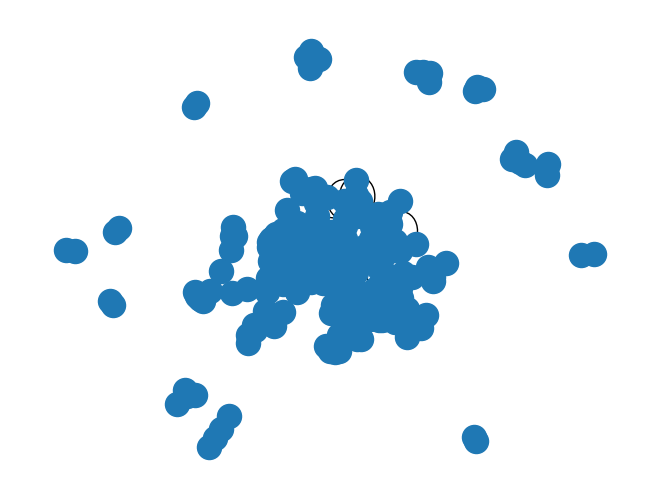

In [22]:
import networkx as nx
nx.draw(nxgraph)

---

# <a style="border: solid; padding:5pt; color:black; background-color:#909090">Appendix - Other visualizations</a>

---

## Matrix plots

### `df.mp_plot.matrix(...)`

In [23]:
procs_df.mp_plot.matrix(
    x="CreatedProcessParentName",
    y="CreatedProcessName",
    height=1600,
)

Loading BokehJS ...

figure(id='p7746', ...)

## Plot inverse - fewer interactions == larger circle

In [24]:
procs_df.mp_plot.matrix(
    x="CreatedProcessParentName",
    y="CreatedProcessName",
    height=1600,
    invert=True
)

Loading BokehJS ...

figure(id='p7934', ...)

In [25]:
procs_df[~procs_df["CreatedProcessAccountName"].isin(["LOCAL SERVICE", "SYSTEM", "NETWORK SERVICE"])].mp_plot.matrix(
    x="CreatedProcessAccountName",
    y="CreatedProcessName",
    height=800,
    invert=True,
    title="Processes executed by user (rarity)"
)

Loading BokehJS ...

figure(id='p8122', ...)

## Folium Map

### `df.mp_plot.folium_map(...)`

In [ ]:

ioc_df = pd.read_csv("./data/cobalt_strike_c2_otx.csv")
ioc_ip_df = ioc_df[ioc_df["Indicator type"] == "IPv4"]

ioc_ip_df.mp_plot.folium_map(ip_column="Indicator")